# FIN 6320 Final Project
# By:  Shijie Sheng, Jed DeCamp, and Dakota Ferrin

# Question 1

We used the test scripts in probo to find the following answers.  Some of the test scripts we had to create using much of the same code from the code written by Tyler in other test scripts.  

The Black-Scholes call and put prices are \$3.3991 and \$1.6070, respectively. 

Using 100000 replications, we find the following:

Using the Naive Monte Carlo method, the call and put prices were \$3.4139 and \$1.6095, respectively and the standard errors for the call and put were 0.0145 and 0.0086, respectively.

Using the Antithetic Monte Carlo method, the call and put prices were \$3.4157 and \$1.5967, respectively and the standard errors for the call and put were 0.0146 and 0.0085, respectively.

Using the Stratified Monte Carlo method, the call and put prices were \$3.3991 and \$1.6070, respectively and the standard errors for the call and put were 0.0145 and 0.0086, respectively.

Using the Delta Control Variate Monte Carlo method, the call and put prices were \$3.3992 and (), respectively and the standard errors for the call and put were 0.0056 and (), respectively.

Note: We tried to calculate the put price using the Delta Control Variate Monte Carlo method, and the code wouldn't run so we don't have the price and standard error for that part of this question.  See the engine.py file for our attempt.  

The prices between all the monte carlo methods were very similar and also very close to the Black-Scholes price.  The standard errors between the Naive, Antithetic, and Stratified Monte Carlo methods were very similar in our results with the exception of the Control Variate standard error (for the call), which was much lower than the standard errors of the other three methods.  If we could the the Control Variate put code to work, we should observe a decreased standard error, also.  In theory, the standard errors of the antithetic, stratified, and control variate methods should be lower than that of the naive method because each method is more accurately calculating the call price (by using more draws of random variables, creating a more normal distribution, or correcting the price using another price estimation).  This result was not fully observed in our data, but is what should be the case.

In [4]:
class VanillaPayoff(Payoff):
    def __init__(self, expiry, strike, payoff):
        self.__expiry = expiry
        self.__strike = strike
        self.__payoff = payoff

    def payoff(self, spot):
        return self.__payoff(self, spot)
    
def call_payoff(option, spot):
    return maximum(spot - strike, 0.0)

def put_payoff(option, spot):
    return maximum(strike - spot, 0.0)

NameError: name 'Payoff' is not defined

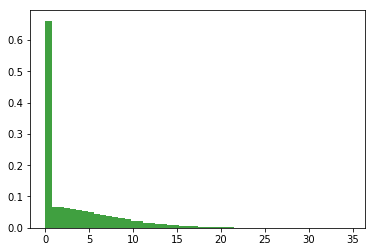

(3.3992987865001831, 0.014493237693616736)

In [7]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

def NaiveMonteCarloPricer(option, spot, strike, vol, div, rate, expiry, steps, nreps):
    dt = expiry / steps
    disc = np.exp(-rate * dt)
    
    z = np.random.normal(size = nreps)
    spotT = spot * np.exp((rate - div - 0.5 * vol * vol) * dt + vol * np.sqrt(dt) * z)
    payoffT = option.payoff(spotT)

    prc = payoffT.mean() * disc

    payoffT_standard_deviation = np.std(payoffT, ddof = 1)
    payoffT_standard_error = payoffT_standard_deviation / np.sqrt(nreps)
	
    hist = plt.hist(payoffT * disc, 50, normed = 1, facecolor = 'green', alpha=0.75)
    plt.show(hist)
    
    return (prc, payoffT_standard_error)

spot = 41
strike = 40
vol = .3
rate = .08
expiry = 0.25
div = 0
steps = 1
nreps = 100000
thecall = VanillaPayoff(expiry, strike, call_payoff)

NaiveMonteCarloPricer(thecall, spot, strike, vol, div, rate, expiry, steps, nreps)

### Graphs:

We tried making graphs in the probo code, but could not get it to work so we tried in this notebook (see above).  We were able to get a graph to print, but it did not look how we expected it to.  Instead, we drew graphs by hand showing what the results should have been.  **The histogram and convergence graph are in the github folder saved as image files.  **

# Question 2

#### With the $S_T^2$ payoff, we found the following results:

Using the Naive Monte Carlo method, the option price was \$1753.3466 and the standard error was 1.7323.

Using the Antithetic Monte Carlo method, the option price was \$1754.0530 and the standard error was 1.7373.

Using the Stratified Monte Carlo method, the option price was \$1753.9795 and the standard error was 1.7364.

#### With the $\sqrt{S_T}$ payoff, we found the following results:

Using the Naive Monte Carlo method, the option price was \$6.3203 and the standard error was 0.0015.

Using the Antithetic Monte Carlo method, the option price was \$6.3216 and the standard error was 0.0015.

Using the Stratified Monte Carlo method, the option price was \$6.3216 and the standard error was 0.0015.

#### With the $S_T^{-1}$ payoff, we found the following results:

Using the Naive Monte Carlo method, the option price was \$0.0240 and the standard error was 0.0000.

Using the Antithetic Monte Carlo method, the option price was \$0.0240 and the standard error was 0.0000.

Using the Stratified Monte Carlo method, the option price was \$0.0240 and the standard error was 0.0000.

#### Compare Results:

For each strange payoff we added, we found that the option price was very similar (and sometimes the same) regardless of whether we used Naive, Antithetic, or Stratified Monte Carlo method.  For each strange payoff, we found that the standard errors did not change very much (and sometimes not at all) between diffent Monte Carlo methods.  In fact, on the spot price squared payoff, the standard error was greater with the Antitheticand Stratified methods than it was with the Naive method.  

In theory, the standard errors of the antithetic and stratified methods should be lower than that of the naive method.  This was not observed in our data, but is what should be the case.  

# Question 3

We started trying to add code to probo to price the Asian option, but we didn't figure it all out before we ran out of time.  See the engine.py file in the github folder for our attempt.  You will find the main pricer under the title 'AsianPricer' and the Control Variate function under the title 'GeometricAsian'.  We didn't finish either of the function codes, but feel free to look at our progress.  Since we didn't finish the code, we didn't create a test script to run this file and have not run it.  Therefore, we don't have the option price and standard error answers and cannot compare it to the Naive Monte Carlo method.  Just as in the graphs for problem 1, the control variate method would have had a much tighter spot price distribution in the histogram and would would have converged to the Black-Scholes price with less simulations than the Naive method.  